In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
train_dir = r'C:\Users\Gaurav\Deep Learning Data\train'
validation_dir = r'C:\Users\Gaurav\Deep Learning Data\validation'
test_dir = r'C:\Users\Gaurav\Deep Learning Data\test'

In [3]:
from tensorflow.keras.preprocessing import image

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dropout((0.5)),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras import optimizers

In [8]:
model.compile(optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [9]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 163s 2s/step - loss: 0.6939 - acc: 0.5085 - val_loss: 0.6908 - val_acc: 0.5090
Epoch 2/100
100/100 [==============================] - 82s 819ms/step - loss: 0.6829 - acc: 0.5620 - val_loss: 0.7619 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 83s 830ms/step - loss: 0.6755 - acc: 0.5760 - val_loss: 0.6493 - val_acc: 0.6310
Epoch 4/100
100/100 [==============================] - 87s 875ms/step - loss: 0.6565 - acc: 0.6160 - val_loss: 0.6324 - val_acc: 0.6440
Epoch 5/100
100/100 [==============================] - 87s 873ms/step - loss: 0.6457 - acc: 0.6230 - val_loss: 0.6250 - val_acc: 0.6450
Epoch 6/100
100/100 [==============================] - 84s 836ms/step - loss: 0.6248 - acc: 0.6565 - val_loss: 0.5977 - val_acc: 0.6700
Epoch 7/100
100/1

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

<function matplotlib.pyplot.show(*args, **kw)>

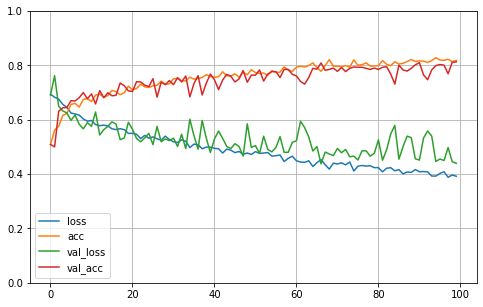

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [12]:
model.save('cats_and_dogs_augmented_cnn.h5')